# *ANN -Artificial Neural Network*

### *Analysis objective :<br>Applying -ANN- model on the prediction of -gender- as a target Feature*
---

In [2]:
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
df=pd.read_csv(r"cleand_df.csv")

In [4]:
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,severity,frequincy
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,0.0,0.0
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,0.0,0.0
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,0.0,0.0
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,0.0,0.0
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,0.0,0.0


---

* *Creat new dataset copy*

In [5]:
df2=df.copy()

* *Convert Some features to object data type :*

In [6]:
df2["veh_age"]=df2["veh_age"].astype("object")
df2["agecat"]=df2["agecat"].astype("object")
df2["clm"]=df2["clm"].astype("object")
df2["numclaims"]=df2["numclaims"].astype("object")

* *Apply LabelEncoder on categorical features*

In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder_category=LabelEncoder()

In [8]:
for col in df2:
    if col in ["gender","numclaims","veh_body","veh_age","area","agecat","clm"]:
        df2[col]=LabelEncoder_category.fit_transform(df2[col])

* *Determine Target and input Features :*

In [9]:
x=df2.drop("gender",axis=1)
y=df2["gender"]

* *Importing needed Libraries :*

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import (r2_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix)
import warnings
from sklearn.utils.multiclass import unique_labels

* *Data Splitting :*

In [11]:
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=0)

In [12]:
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)

* *Importing Tensorflow :*

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

* *Model Preparation :*

In [17]:
classifier=Sequential()

* *1st Hidden Layer :*

In [18]:
classifier.add(Dense(units=11,activation="ReLU"))

* *2nd Hidden Layer :*

In [19]:
classifier.add(Dense(units=6,activation="ReLU"))

* *Last Layer -Output :*

In [20]:
classifier.add(Dense(1,activation="sigmoid"))

* *Adam Optimizer Preparation :*

In [21]:
import tensorflow
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

* *Compiling the Model :*

In [22]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

* *Early Stopping Preparation :*

In [23]:
import tensorflow
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

* *Model Fitting :*

In [24]:
model_history=classifier.fit(xtrain_sc,ytrain,validation_split=.33,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


995/995 [==============================] - 3s 2ms/step - loss: 0.6598 - accuracy: 0.6138 - val_loss: 0.6533 - val_accuracy: 0.6209
Epoch 2/1000
995/995 [==============================] - 2s 2ms/step - loss: 0.6486 - accuracy: 0.6259 - val_loss: 0.6520 - val_accuracy: 0.6263
Epoch 3/1000
995/995 [==============================] - 2s 2ms/step - loss: 0.6470 - accuracy: 0.6301 - val_loss: 0.6530 - val_accuracy: 0.6281
Epoch 4/1000
995/995 [==============================] - 2s 2ms/step - loss: 0.6463 - accuracy: 0.6305 - val_loss: 0.6491 - val_accuracy: 0.6244
Epoch 5/1000
995/995 [==============================] - 2s 2ms/step - loss: 0.6457 - accuracy: 0.6317 - val_loss: 0.6519 - val_accuracy: 0.6242
Epoch 6/1000
995/995 [==============================] - 2s 2ms/step - loss: 0.6461 - accuracy: 0.6303 - val_loss: 0.6511 - val_accuracy: 0.6248
Epoch 7/1000
995/995 [==============================] - 2s 2ms/step - loss: 0.6462 - accuracy: 0.6307 - val_loss: 0.6492 - val_accurac

In [25]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

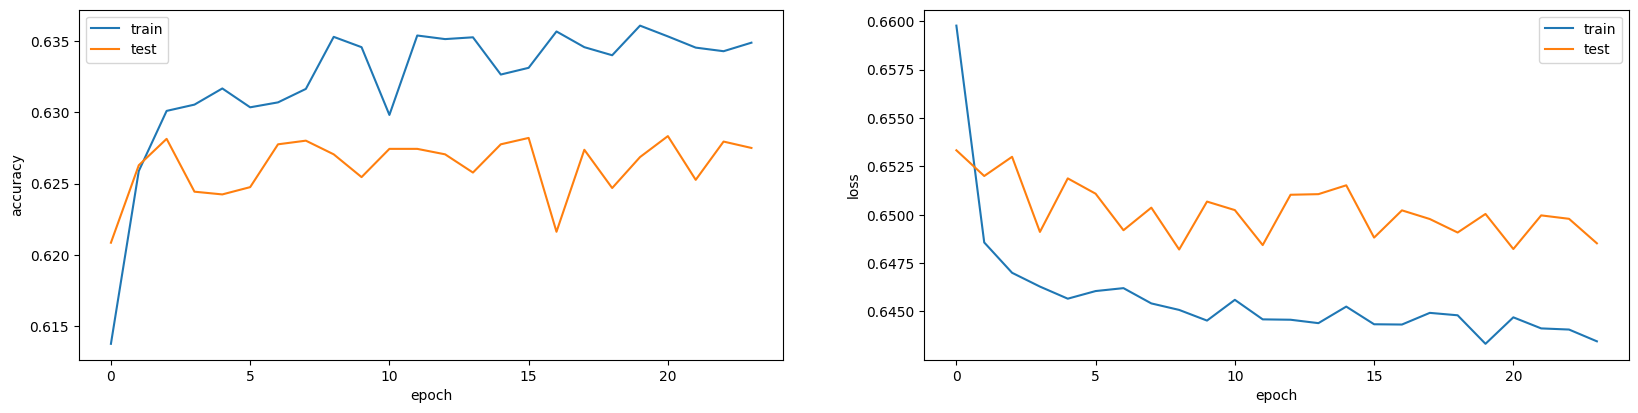

In [26]:
plt.subplot(221)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"]);


plt.subplot(222)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"]);

In [27]:
y=classifier.predict(xtest_sc)

637/637 [==============================] - 1s 1ms/step


In [28]:
y=y>.5

In [29]:
confusion_matrix(ytest,y)

array([[8735, 2788],
       [4689, 4145]], dtype=int64)

In [30]:
accuracy_score(ytest,y)

0.6327061944294345

In [31]:
unique_labels(ytest)
labels=unique_labels(ytest)
col_names=[f"predicted{label}"for label in labels ]
index_names=[f"Actual{label}"for label in labels ]
pd.DataFrame(confusion_matrix(ytest, y),columns=col_names,index=index_names)

,predicted0,predicted1
Actual0,8735,2788
Actual1,4689,4145


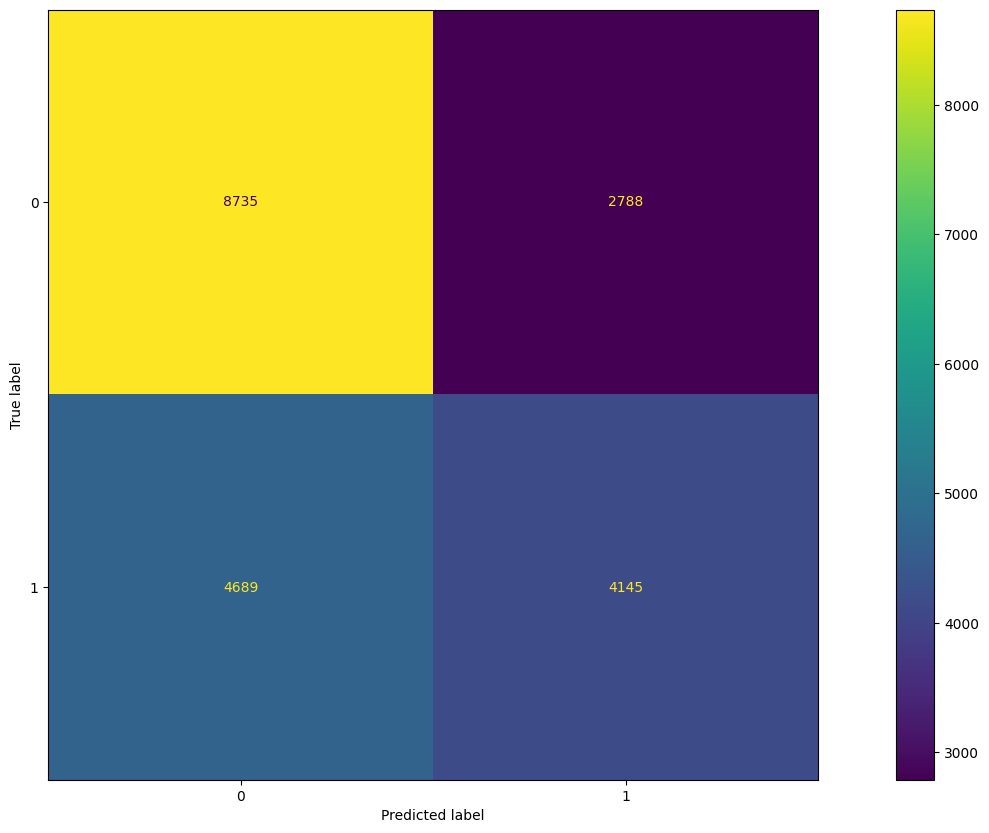

In [32]:
ConfusionMatrixDisplay(confusion_matrix(ytest,y)).plot();

In [33]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70     11523
           1       0.60      0.47      0.53      8834

    accuracy                           0.63     20357
   macro avg       0.62      0.61      0.61     20357
weighted avg       0.63      0.63      0.62     20357



In [34]:
import pickle
with open ("gender_prediction_model.pkl","wb") as f:
    pickle.dump(classifier,f)